In [1]:
import numpy as np
import pandas as pd

In [4]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Cleansing

#### Clean and Numeric Data Handling

In [6]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

In [7]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df_data.dropna(inplace=True)

In [9]:
# Delete ID
df_data.drop('customerID', axis=1, inplace=True)
df_data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [14]:
# Convert target variable "Churn" to numeric
df_data['Churn'].replace(to_replace=['Yes', 'No'], value=[1, 0], inplace=True)

In [15]:
df_data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [12]:
df_data_processing = df_data.copy()

#### Handle Categorical Variables

In [13]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


### Correlation Analysis

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

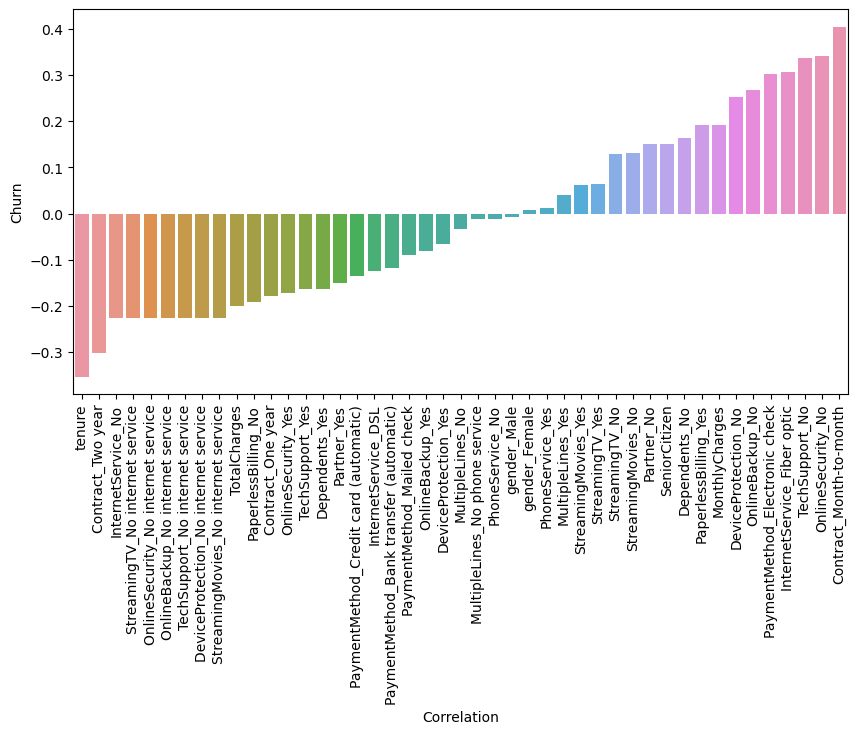

In [30]:
data_corr = df_data_processing.corr()['Churn'].sort_values()[:-1].reset_index()

fig = plt.figure(figsize=(10,5))
sns.barplot(data=data_corr, x="index", y="Churn")
plt.xlabel('Feature')
plt.xlabel('Correlation')
plt.xticks(rotation=90)
plt.show()

##### Scale data

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing)

In [37]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [39]:
df_data_processing_scaled.columns = df_data_processing.columns

In [40]:
df_data_processing_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### EDA

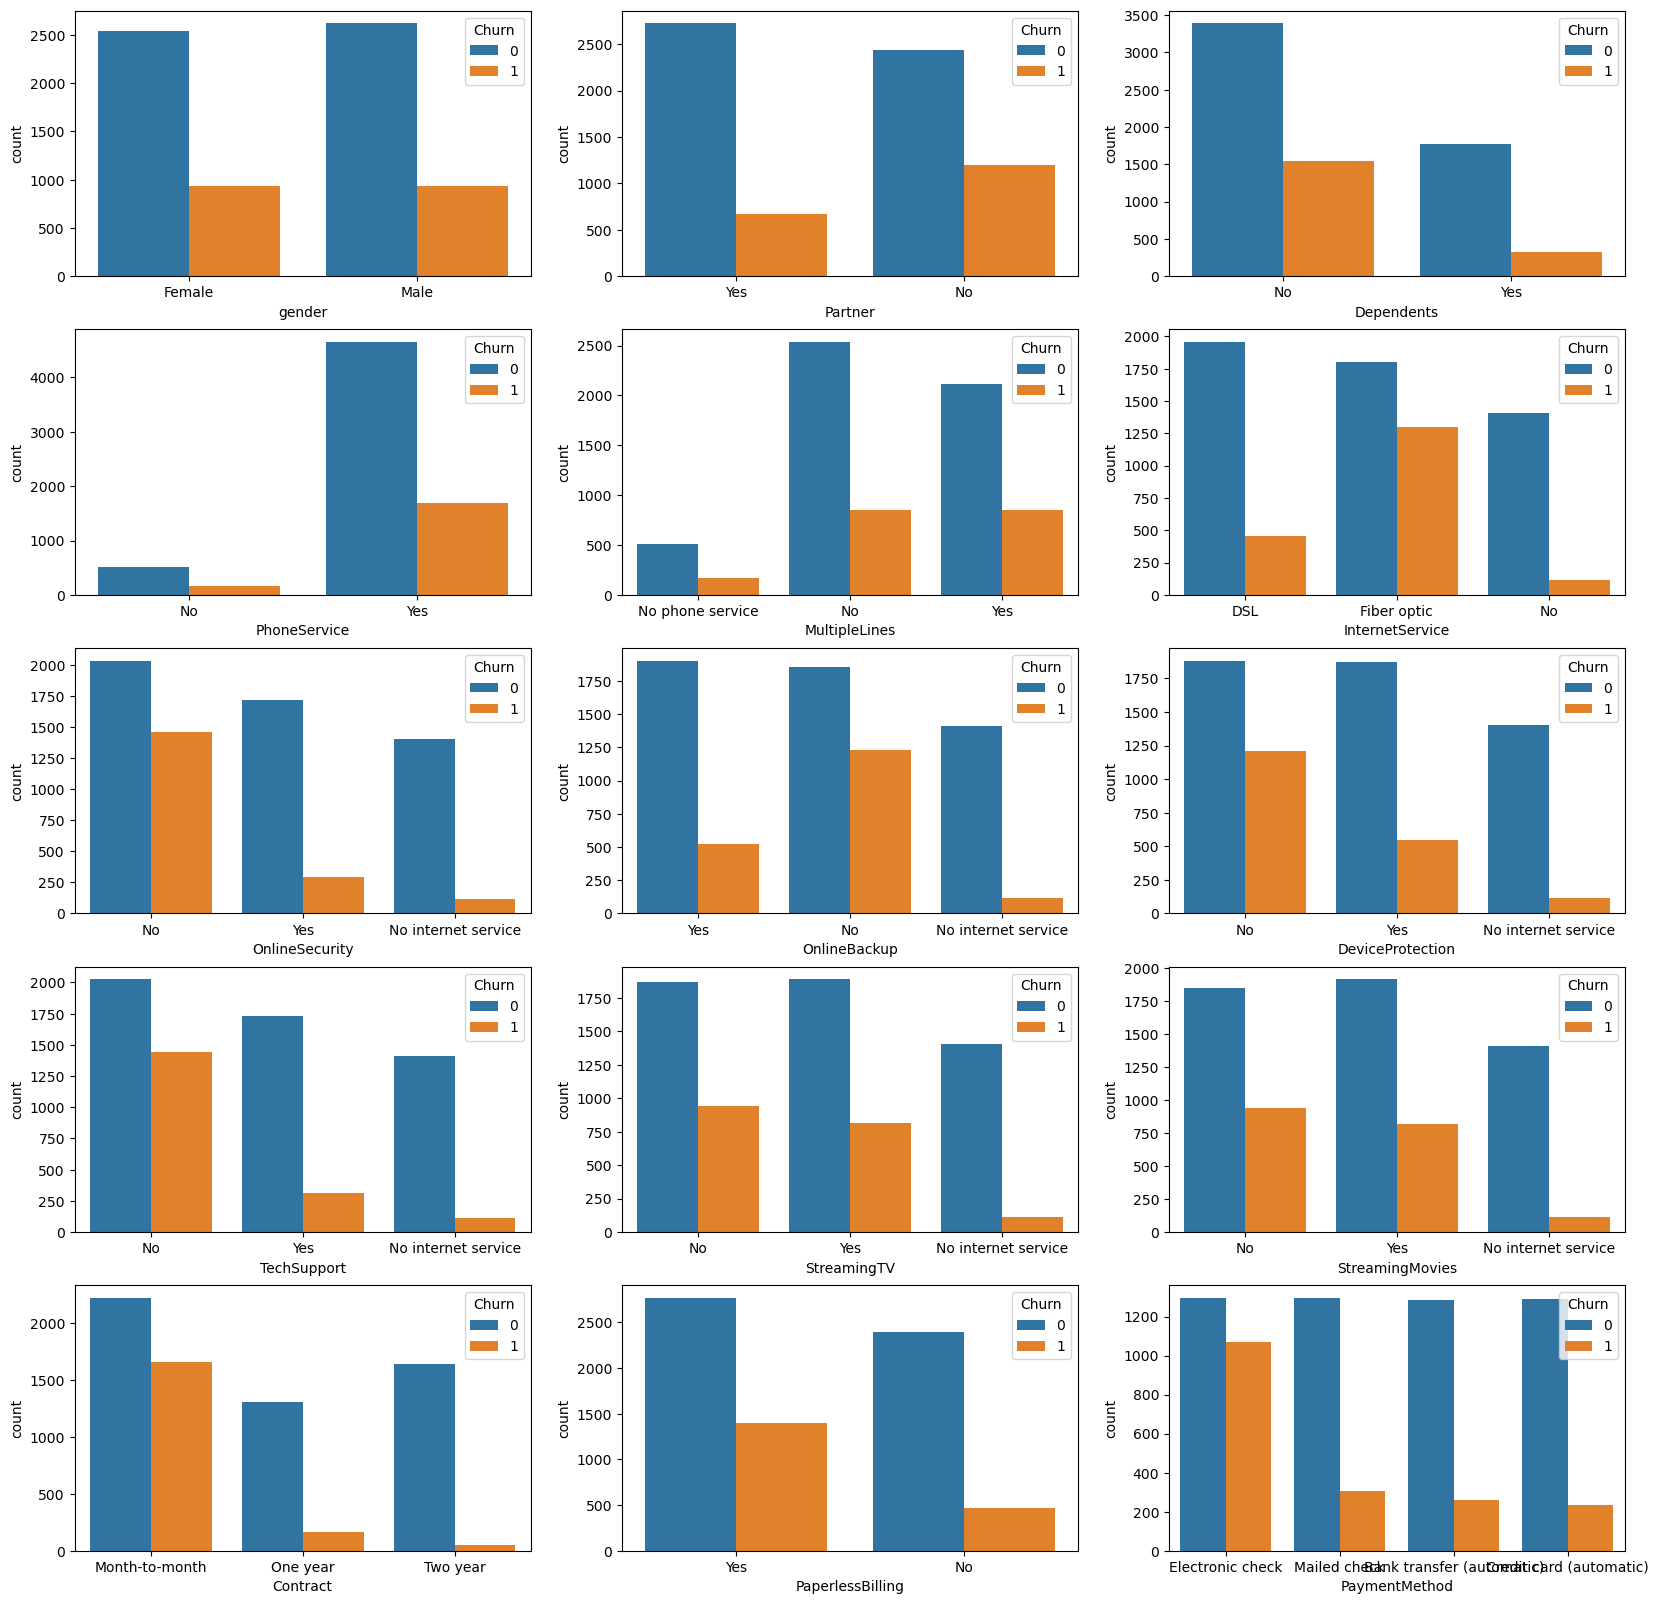

In [43]:
columns_categ = df_data.select_dtypes(include='object').columns

# Create figure and subplots
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for var, ax in zip(columns_categ, axs.flatten()):
    sns.countplot(data=df_data, x=var, hue='Churn', ax=ax)

<Figure size 1000x600 with 0 Axes>

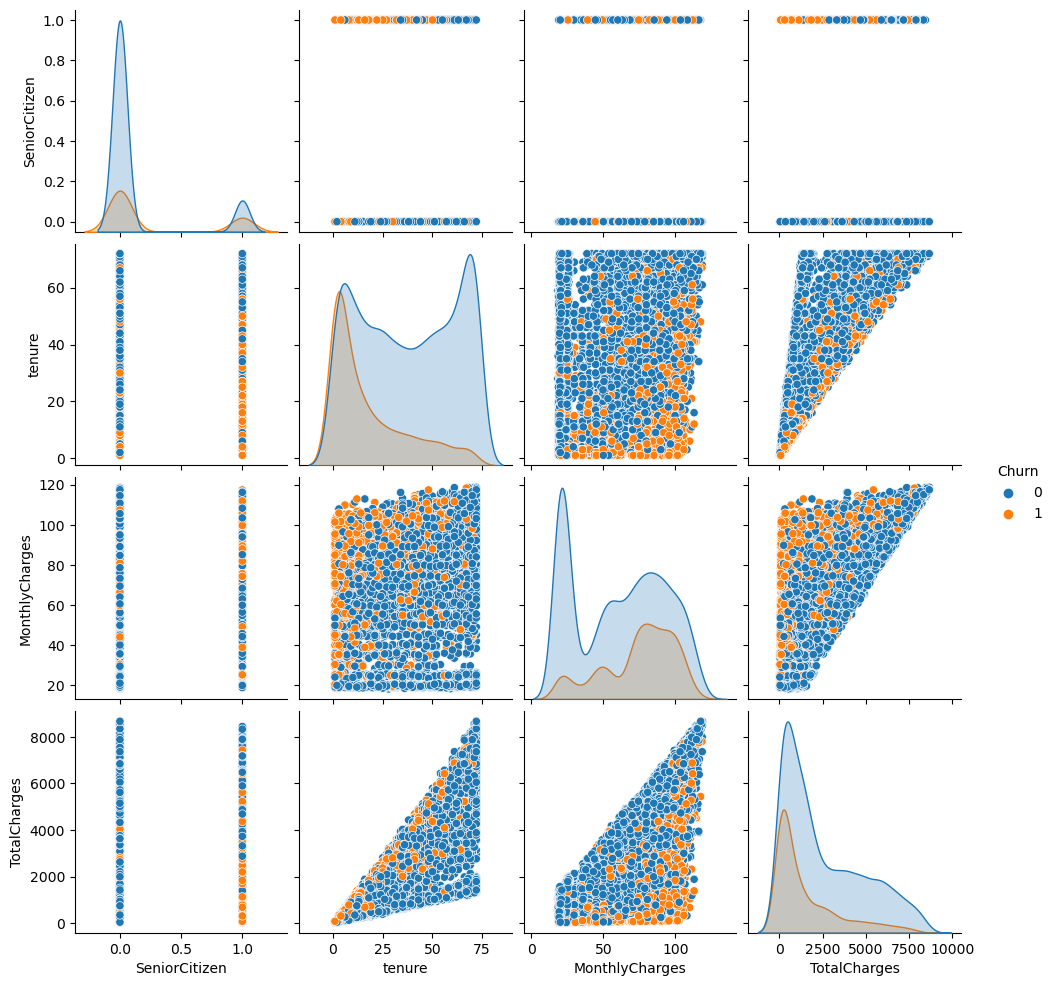

In [44]:
fig = plt.figure(figsize=(10,6))
sns.pairplot(data=df_data, hue='Churn')
plt.show()

### Training Binomial Logistic Regression Model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [49]:
X = df_data_processing_scaled.drop('Churn', axis=1)
y = df_data_processing_scaled['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
print(X_train.shape)
print(X_test.shape)

(4922, 45)
(2110, 45)


In [59]:
model = LogisticRegression()
result = model.fit(X_train, y_train)

c:\Users\Milo\anaconda3\envs\ml-env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.795734597156398


#### Evaluating Model

In [61]:
model.predict_proba(X_test)

array([[0.99021182, 0.00978818],
       [0.86177511, 0.13822489],
       [0.30193067, 0.69806933],
       ...,
       [0.99028272, 0.00971728],
       [0.7013241 , 0.2986759 ],
       [0.82865263, 0.17134737]])

In [65]:
model.coef_

array([[ 2.16455883e-01, -3.10072273e+00, -1.62263734e-01,
         1.19637115e+00,  9.34872748e-04, -2.24821220e-02,
        -7.14992437e-02,  4.99519944e-02,  1.16804791e-01,
        -1.38352040e-01,  8.51120130e-02, -1.06659262e-01,
        -1.58856018e-01,  8.51120130e-02,  5.21967559e-02,
        -4.17811086e-01,  5.11403573e-01, -1.15139736e-01,
         2.40089149e-01, -1.15139736e-01, -1.46496662e-01,
         8.40750424e-02, -1.15139736e-01,  9.51744429e-03,
         5.65178379e-02, -1.15139736e-01,  3.70746488e-02,
         2.20214539e-01, -1.15139736e-01, -1.26622052e-01,
        -8.59219575e-02, -1.15139736e-01,  1.79514444e-01,
        -8.76642939e-02, -1.15139736e-01,  1.81256781e-01,
         7.42704381e-01, -9.75395678e-02, -6.66712063e-01,
        -1.13993770e-01,  9.24465212e-02, -2.72745173e-03,
        -1.58700807e-01,  2.16923165e-01, -7.70421554e-02]])

In [66]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

Axes(0.125,0.11;0.775x0.77)


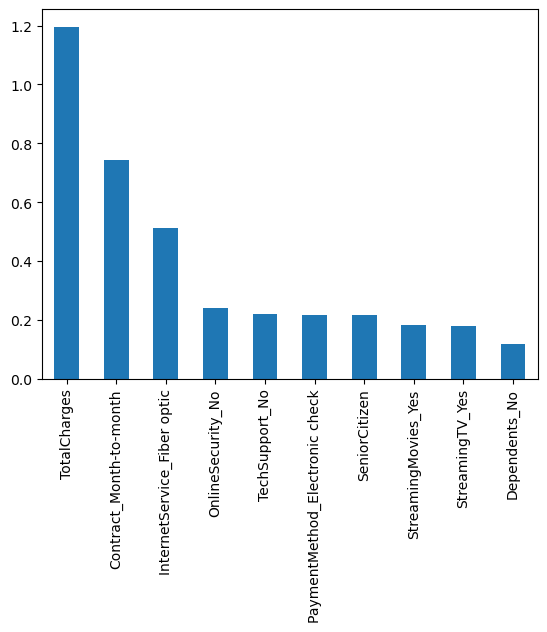

In [69]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values)

print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


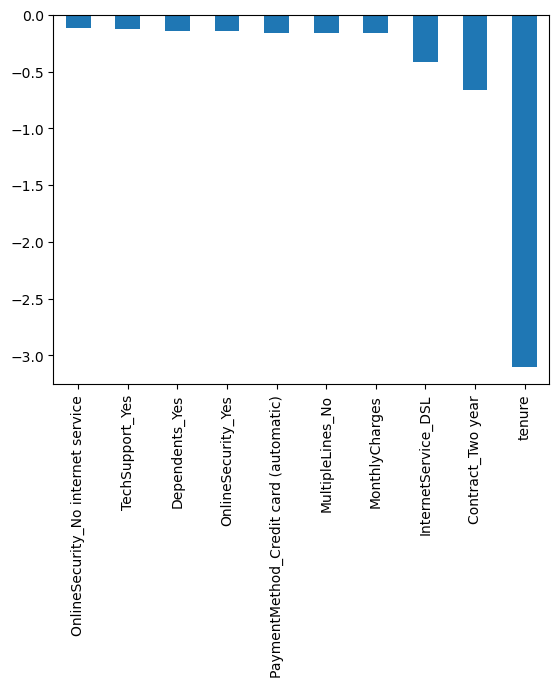

In [70]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1000x600 with 0 Axes>

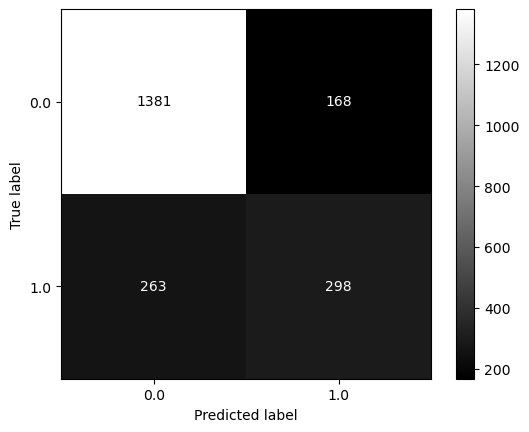

In [72]:
fig = plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot(cmap='gray')
plt.show()

##### Delete some features to improve accuracy

In [73]:
df_data_processing_scaled.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [85]:
df_data_processing_scaled['OnlineSecurity_No internet service'].nunique()

2

In [90]:
df_data_processing_scaled.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [98]:
df_data2 = df_data.copy()
df_data2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [99]:
df_data2.drop(['gender', 'MultipleLines', 'PhoneService', 'StreamingMovies', 'StreamingTV'], axis=1, inplace=True)

In [100]:
df_data2 = pd.get_dummies(df_data2)
df_data2_scaled = scaler.fit_transform(df_data2)
df_data2_scaled = pd.DataFrame(df_data2_scaled)
df_data2_scaled.columns = df_data2.columns

In [102]:
X = df_data2_scaled.drop('Churn', axis=1)
y = df_data2_scaled['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.7919431279620853


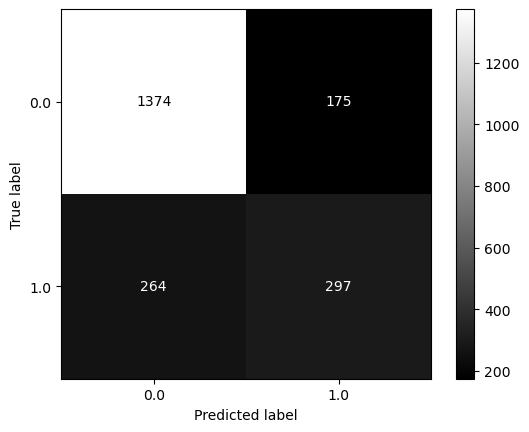

Accuracy model:  0.7919431279620853
Recall Churn='NO':  0.8870238863783085
Recall Churn='YES':  0.5294117647058824


In [103]:
#Visualizamos los resultados
cm_r = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp_r = ConfusionMatrixDisplay(confusion_matrix=cm_r, display_labels=model.classes_)
disp_r.plot(cmap='gray')
plt.show()

print("Accuracy model: ", metrics.accuracy_score(y_test, prediction_test))
print("Recall Churn='NO': ", metrics.recall_score(y_test, prediction_test, pos_label=0))
print("Recall Churn='YES': ", metrics.recall_score(y_test, prediction_test, pos_label=1))

In [113]:
df_countries = pd.DataFrame([[1,pd.NA,3],[4,5,6]], columns=(['col1','col2','col3']))
df_countries = df_countries[df_countries['col2'].notnull()]
df_countries

,col1,col2,col3
1,4,5,6
